In [1]:
%pip install matplotlib tqdm

import matplotlib.pyplot as plt
import preprocess as pp
import torch
from write_data import write_data
# from train import train_network

            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
agherasie@agherasie-Predator-PH315-52 
------------------------------------- 
OS: Ubuntu 22.04.1 LTS x86_64 
Host: Predator PH315-52 V1.04 
Kernel: 5.15.0-46-generic 
Uptime: 4 hours, 42 mins 
Packages: 2778 (dpkg), 11 (snap) 
Shell: fish 3.3.1 
Resolu

/home/agherasie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


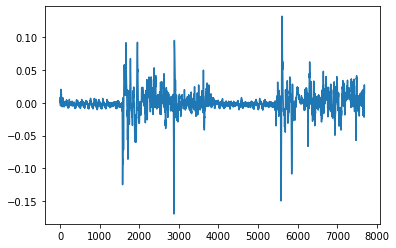

In [2]:
train_set = pp.convert_dataset("../data/Focus.csv")
mean_values = pp.get_mean_values(train_set)
plt.plot(mean_values)
plt.show()

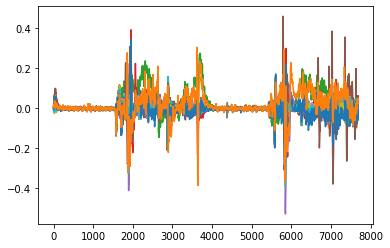

In [3]:
plt.plot(train_set)
plt.show()

In [4]:
def labelize_set(train_set):
    result = list()
    for index, element in enumerate(train_set):
        if index < 1500 or (3900 < index < 5400):
            result.append((element, 0))
        else:
            result.append((element, 1))
    return result
    
labelled_set = labelize_set(train_set)
focusedCount = 0
for signals, labels in labelled_set:
    if labels == 0:
        focusedCount+=1

write_data(labelled_set, "../models/focusdata.csv")

FileExistsError: [Errno 17] File exists: '../models/focusdata.csv'

In [5]:
from load_data import load_dataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm


dataset = load_dataset("../models/focusdata.csv")

In [6]:
def train(train_set, test_set, epoch, batch_size, learning_rate, network):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)
    # # Load a loss calculator and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=0.9)

    train_accuracies = np.zeros(epoch)
    test_accuracies = np.zeros(epoch)

    for iteration in tqdm(range(epoch)):
        average_loss = 0.0

        # Training
        total = 0
        success = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            output = network.forward(inputs, len(inputs))
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            average_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            success += (predicted == labels.data).sum()
        train_accuracies[iteration] = 100.0 * success / total
        # -------------------------------------------------------------------

        # Testing
        total = 0
        success = 0
        for inputs, labels in test_loader:
            output = network.forward(inputs, len(inputs))
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            success += (predicted == labels.data).sum()
        test_accuracies[iteration] = 100.0 * success / total
        # -------------------------------------------------------------------

    return network, train_accuracies, test_accuracies


100%|██████████| 200/200 [00:12<00:00, 15.82it/s]


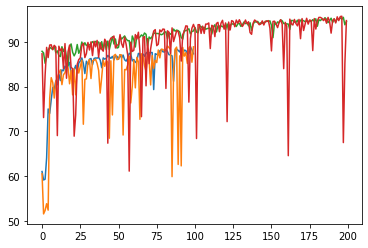

In [16]:
import torch.nn as nn

class LinearClassifierNetwork(nn.Module):
    def __init__(self, label_count):
        super(LinearClassifierNetwork, self).__init__()

        self.label_count = label_count

        # Fully connected layer
        self.linear1 = nn.Linear(32, 64)
        self.linear2 = nn.Linear(64, label_count)
        # --------------------------------

    def forward(self, x, batch_size):
        
        # Fully connected layer
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        # -------------------------
        return x

network = LinearClassifierNetwork(label_count=2)

train_set, test_set = pp.split_data(labelled_set)


network1, train_accuracies1, test_accuracies1 = train(network=network, train_set=train_set, test_set=test_set, epoch=100, learning_rate=0.05, batch_size=64)
network2, train_accuracies2, test_accuracies2 = train(network=network, train_set=train_set, test_set=test_set, epoch=200, learning_rate=0.05, batch_size=64)

plt.plot(train_accuracies1)
plt.plot(test_accuracies1)

plt.plot(train_accuracies2)
plt.plot(test_accuracies2)

In [ ]:
train_accuracies[-1]

In [ ]:
max(train_accuracies)

In [ ]:
torch.save(network.state_dict(), "../models/network.pt")